### **Lifecycle of Machine Learning Project** 

- Understanding the problem statement
- Data Collection
- Exploratory Data Analysis
- Data Cleaning
- Data Preprocessing and Feature Engineering
- Model Training
- Choose the best model

### **About the dataset**

This dataset contains customer information from a telecom company and is used to predict customer churn (whether a customer will leave the service or not).

## **1) Problem Statement**

- The Telecom industry faces revenue loss when the existing customers discontinue their services. 
- The goal is to analyze the customer data and build a predictive model that can identify the customers who are likely to churn in the future.

**In this project we are going to use the data to build a classification model**

- This model is to predict whether the customer will churn or not based on the given dataset
- By accurately predicting churn, the company can take the customer retention actions, optimize their marketing campaign and improve customer satisfaction.

## **2) Data Collection**
- The dataset is part of telecom company.
- The dataset contains 7043 rows and 21 columns.

Dataset Link - [https://www.kaggle.com/datasets/blastchar/telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Dataset Description**

- **customerID** - Unique Identifier for each customer
- **gender** - Customer Gender
- **SeniorCitizen** - Indicates if the customer is Senior citizen or not
- **Partner** - Whether the customer has partner/spouse
- **Dependents** - Whether the customer has dependents(children/others)
- **tenure** - Number of months the customer has stayed with the company 
- **PhoneService** - Whether the customer has phone line or not (voice and non-voice services)
- **MultipleLines** - Whether the customer has multiple phone lines
- **InternetService** - Type of Internet Service 
- **OnlineSecurity** - Whether the customer has online security add-on(antivirus, malware protection,etc.)
- **OnlineBackup** - Whether the customer has online backup service like cloud
- **DeviceProtection** - Whether the customer has device protection (insurance support for device)
- **TechSupport** - premium technical support service
- **StreamingTV** - Whether the Customer uses TV Streaming services
- **StreamingMovies** - Whether the Customer uses Movie streaming services or not
- **Contract** - Type of contract customer signed (monthly/yearly/two years)
- **PaperlessBilling** - Customer recieves bills on email instead of paper mail
- **PaymentMethod** - How customer pays their bills
- **MonthlyCharges** - Amount charged to the customer each month
- **TotalCharges** - Total amount the customer paid entire tenure
- **Churn** (target variable) - Whether the customer left the company or not

**Import Data and Required Packages**

- Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn 

wn.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

**Import the CSV as Pandas DataFrame**

In [3]:
data = pd.read_csv("data/churn-data.csv")

**Showing Top 5 Records**

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Shape of the Dataset**

In [5]:
data.shape

(7043, 21)

**Summary of the dataset**

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Check datatypes in dataset**

In [7]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

- **TotalCharges** column type is str and it contains some missing values
- Convert this column datatype to float

In [8]:
# converting the TotalCharges to numeric type
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors= "coerce")

## **3) Exploratory Data Analysis**

In [9]:
# Defining the numerical and categorical features
numerical_features = [feature for feature in data.columns if data[feature].dtype != "str"]
categorical_features = [feature for feature in data.columns if data[feature].dtype == "str"]

print(f"We have {len(numerical_features)} numerical features : {numerical_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 4 numerical features : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
We have 17 categorical features : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [10]:
print(f"Categorical Features Count Proportion")
for feature in categorical_features :
    print("")
    print(data[feature].value_counts(normalize=True) * 100)

Categorical Features Count Proportion

customerID
7590-VHVEG    0.014198
5575-GNVDE    0.014198
3668-QPYBK    0.014198
7795-CFOCW    0.014198
9237-HQITU    0.014198
                ...   
6840-RESVB    0.014198
2234-XADUH    0.014198
4801-JZAZL    0.014198
8361-LTMKD    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64

gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64

Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64

Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64

PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64

MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

OnlineSecurity
No                     49.666335
Yes                    28

**Insights**
- **customerID** have all unique values which can be dropped as it of no importance
- **gender** is nearly balanced (50%).
- **Dependents** : majority are No (70%).
- Most of the customers have **Phoneservices**. 
- **Fiber optic** is the most common **InternetService** followed by DSL and no internet.
- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport** columns has mostly No share and consistently No internet services (22%).
-  **StreamingTV, StreaminMovies** has equal split between Yes and No with consistent **No internet service** (22%).
- Most of the customers takes month-to-month services **Contract**.
- Most of the customers prefer **Paperless Billing**.
- **Electronic Check** is the most common **Payment Method**.
- **Churn** : Majority is **No** (73%), so the target is imbalanced.

### **Univariate Analysis**
- The purpose is to understand the distribution of each variable

**Numerical Features**

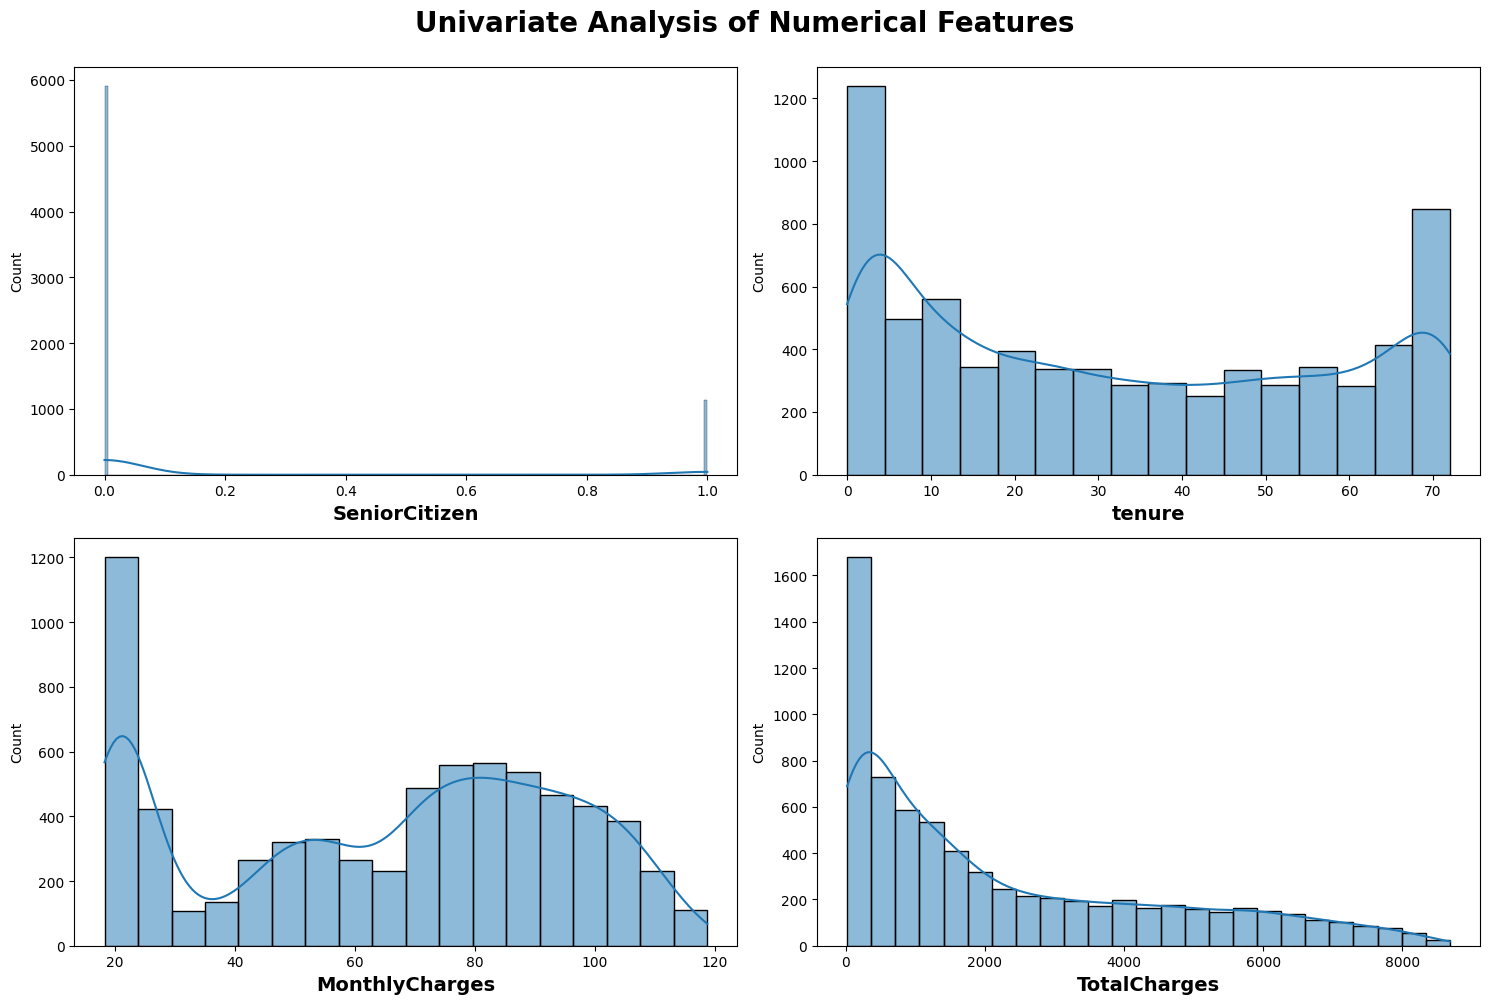

In [11]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold",y=1.0)

for i in range(0, len(numerical_features)) :
    plt.subplot(2,2, i+1)
    sns.histplot(x=numerical_features[i], data=data, kde=True)
    plt.xlabel(numerical_features[i], fontsize=14, fontweight="bold")
    plt.tight_layout()

plt.savefig('plots/univariate_numerical.png')

**Insights**

**i)SeniorCitizen**
- contains Binary feature (0 or 1), not a continuous.
- is Highly imbalanced column where 84% are non-senior citizens(0) and 16% are senior citizen(1).
- Should be treated as a categorical columns in modeling.

**ii) tenure**
- is Right skewed with two peaks.
- first large spike at 0-10 months we can say that they are many new customers.
- Second spike at ~72 months we can say they are loyal and long term customers.
- Churn risk is likely highest for the new customers.

**iii) MonthlyCharges**
- follows Bimodal distribution with three peaks.
- Peak at ~$20 and they are like basic plans (phone only, no internet).
- Peak at ~$45-55 and they are like standard,mid-tier plans (internet services).
- Peak at ~$70-100 and they are like premium plans (internet with addon services).

**iv) TotalCharges**
- is a right skewed distribution with a long tail.
- Most of the customer have low total charges(new customers).
- Long tail represents loyal and high value customers.

**Categorical Features**

In [12]:
categorical_features.remove("customerID")

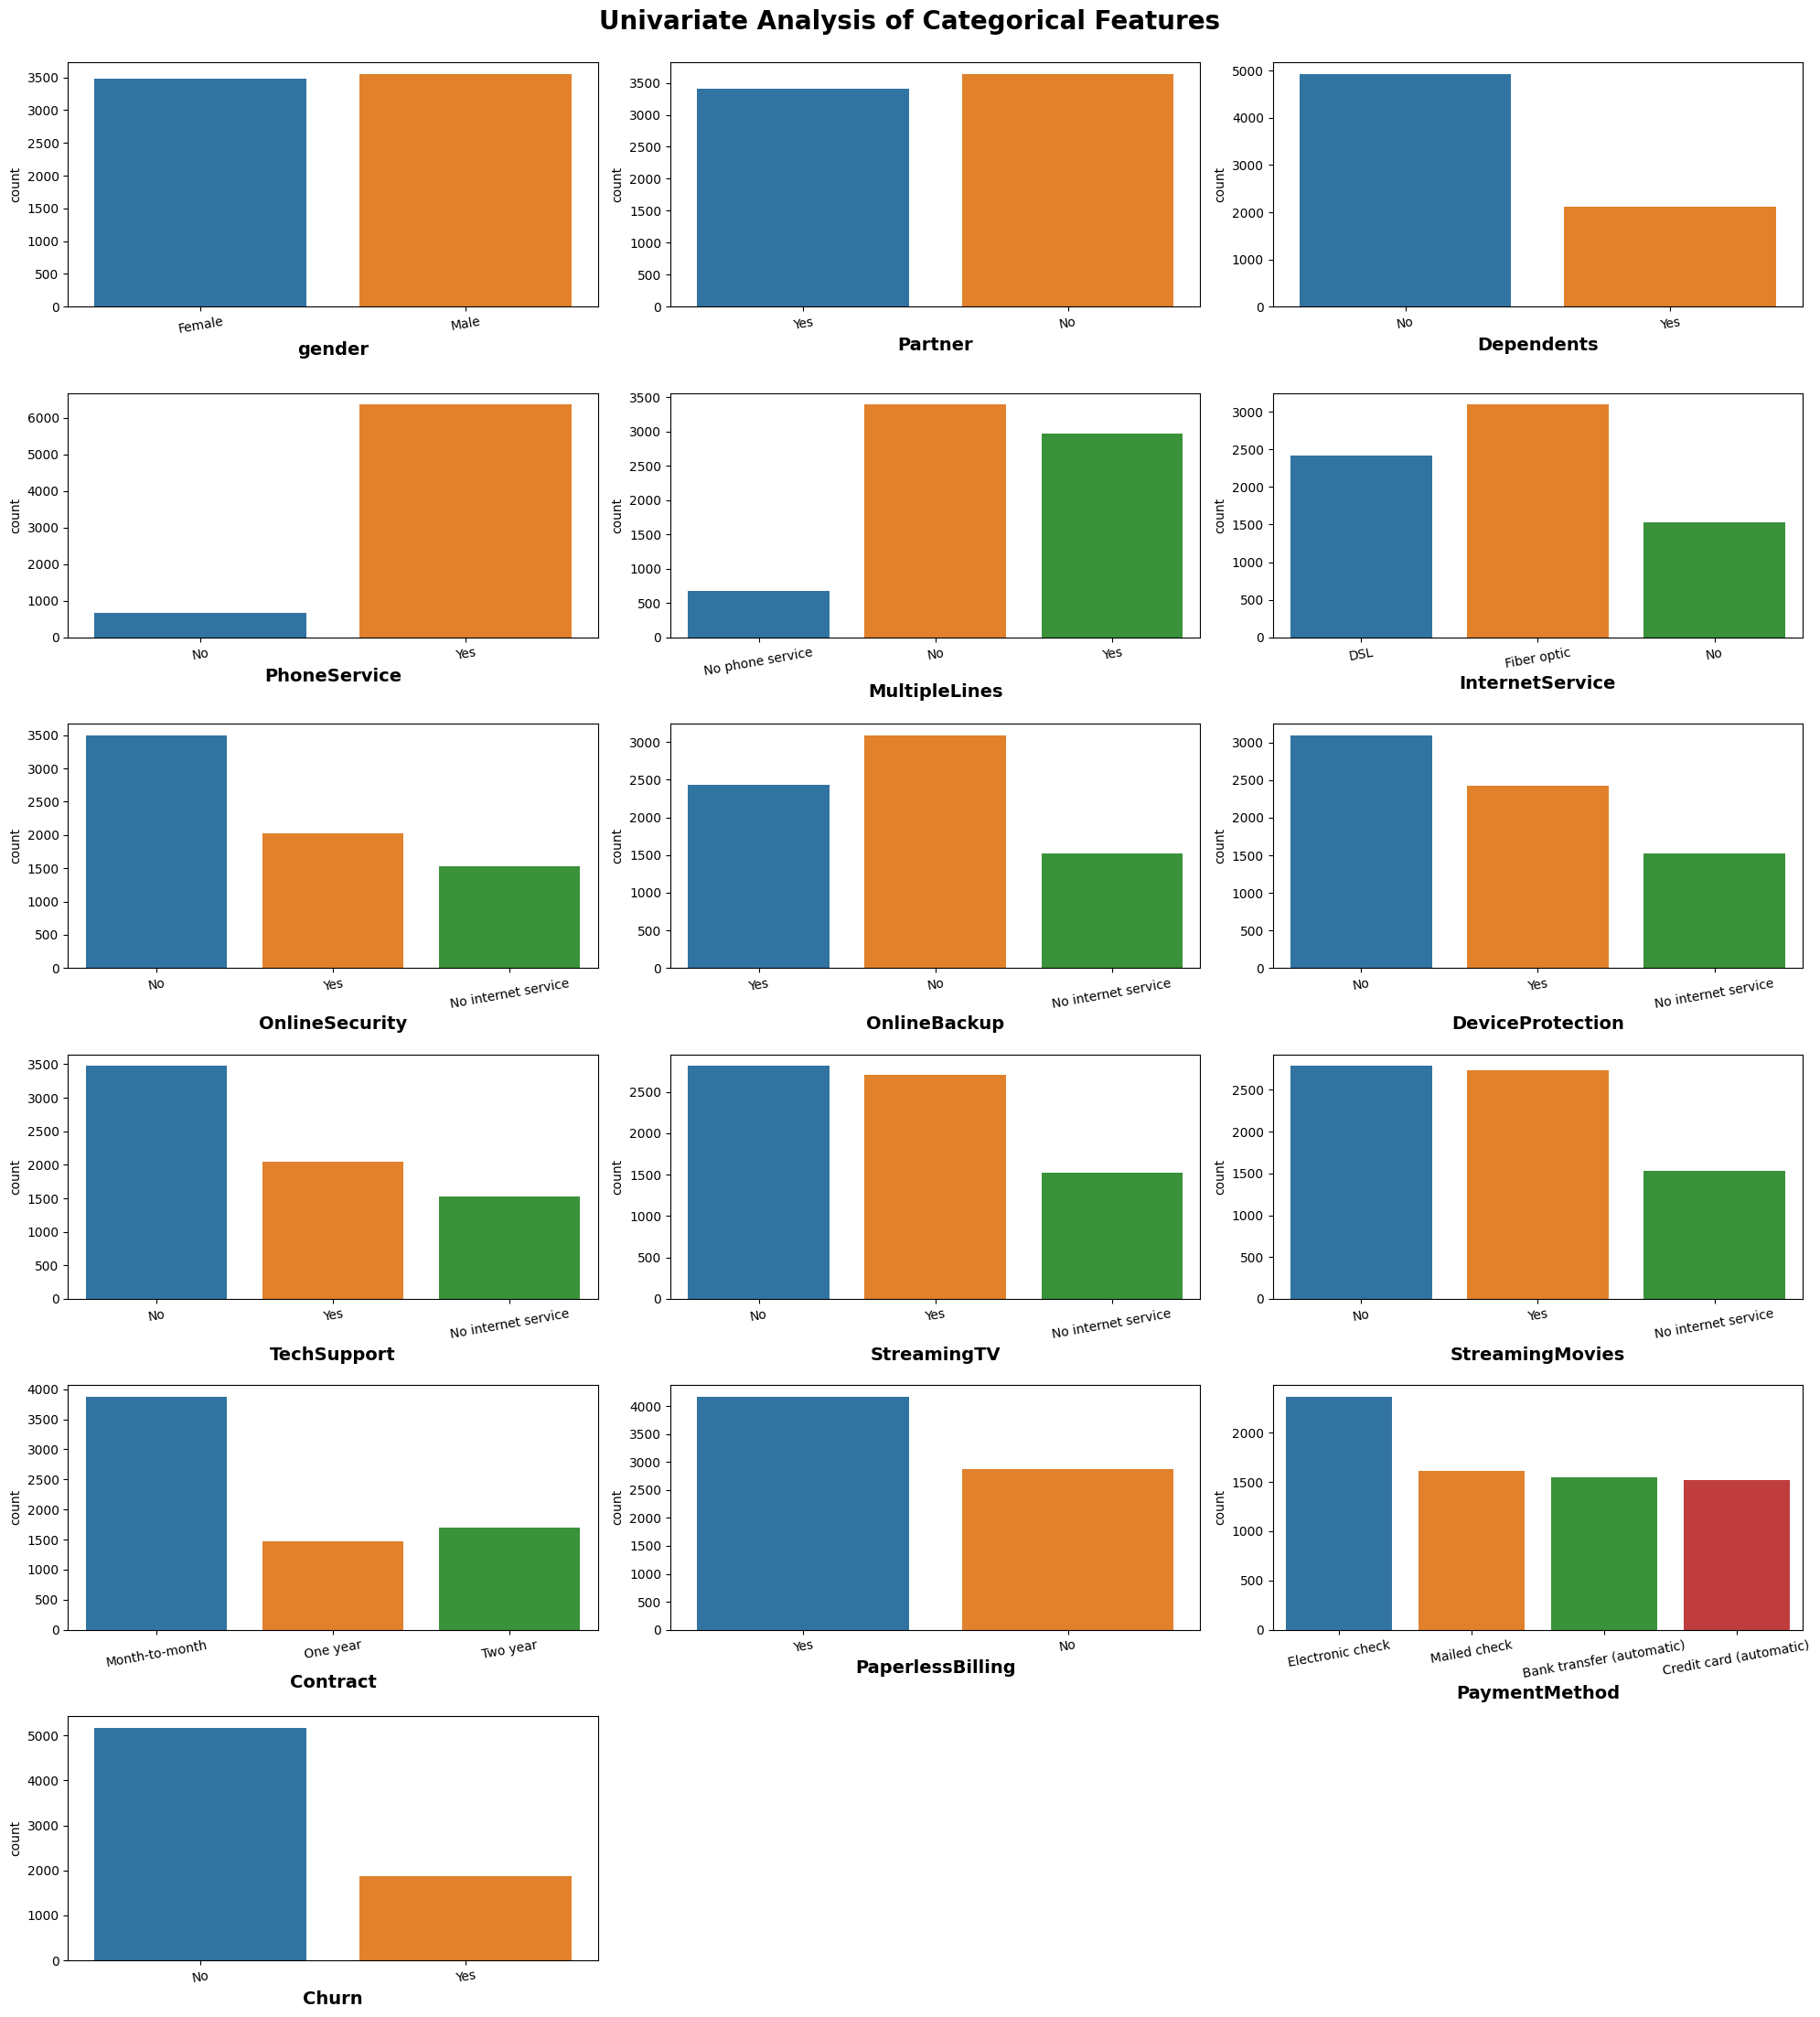

In [13]:
plt.figure(figsize=(20,22))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold",y=1.0)

for i in range(0, len(categorical_features)) :
    plt.subplot(6,3, i+1)
    sns.countplot(x=categorical_features[i], data=data, palette="tab10")
    plt.xlabel(categorical_features[i], fontsize=14, fontweight="bold")
    plt.xticks(rotation=10)
    plt.tight_layout()

plt.savefig("plots/univariate_categorical.png")

**Insights**

- **Churn** is our target feature and is Imbalanced (73% No and 27% Yes),we have to handle it in modeling.
- Most of the customer taken **Month-to-Month Contract**.
- **Electronic Check** is the dominant **PaymentMethod** used by Customers and rest are almost equally used.
- **Fiber Optic** is the most used InternetService by customers (i.e. 43%) followed by DSL (34%) and rest No internet service. 
- **OnlineSecurity, Backup, DeviceProtection, TechSupport** features are less adopted by customers 
- The **gender, Partner** feature is balanced between categories.